# Demo

In [1]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from model import ResNetBinaryClassifier
from PIL import Image
from torchvision import transforms

In [2]:
# Function to load and preprocess demo images
def load_demo_images(demo_folder):
    demo_images = []
    demo_filenames = []

    for filename in os.listdir(demo_folder):
        if filename.endswith('.jpg'):
            img_path = os.path.join(demo_folder, filename)
            img = Image.open(img_path).convert('RGB')
            demo_images.append(img)
            demo_filenames.append(filename)

    return demo_images, demo_filenames

# Function to predict and display demo images with probabilities
def demo(model, demo_folder, device):
    model.eval()
    demo_images, demo_filenames = load_demo_images(demo_folder)

    # Transform to apply same preprocessing as test data
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    class_names = ['Cat', 'Dog']

    images_per_row = 4
    subplot_size = 3

    num_images = len(demo_images)
    num_rows = (num_images + images_per_row - 1) // images_per_row  # Round up

    fig_width = images_per_row * subplot_size
    fig_height = num_rows * subplot_size

    plt.figure(figsize=(fig_width, fig_height))

    for i, img in enumerate(demo_images):
        img_tensor = transform(img).unsqueeze(0).to(device)

        with torch.no_grad():
            outputs = model(img_tensor)
            pred = (outputs > 0.5).float().cpu().numpy()

        prob_cat = 1 - outputs[0][0]  # Probability for Cat
        prob_dog = outputs[0][0]  # Probability for Dog

        plt.subplot(num_rows, images_per_row, i + 1)
        img_for_plotting = np.array(img.resize((224, 224)))  # Resize before plotting
        plt.imshow(img_for_plotting)
        plt.title(f"{demo_filenames[i]}\nPred: {class_names[int(pred[0].item())]}\nProb: Cat {prob_cat:.2%}, Dog {prob_dog:.2%}", fontsize=8)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

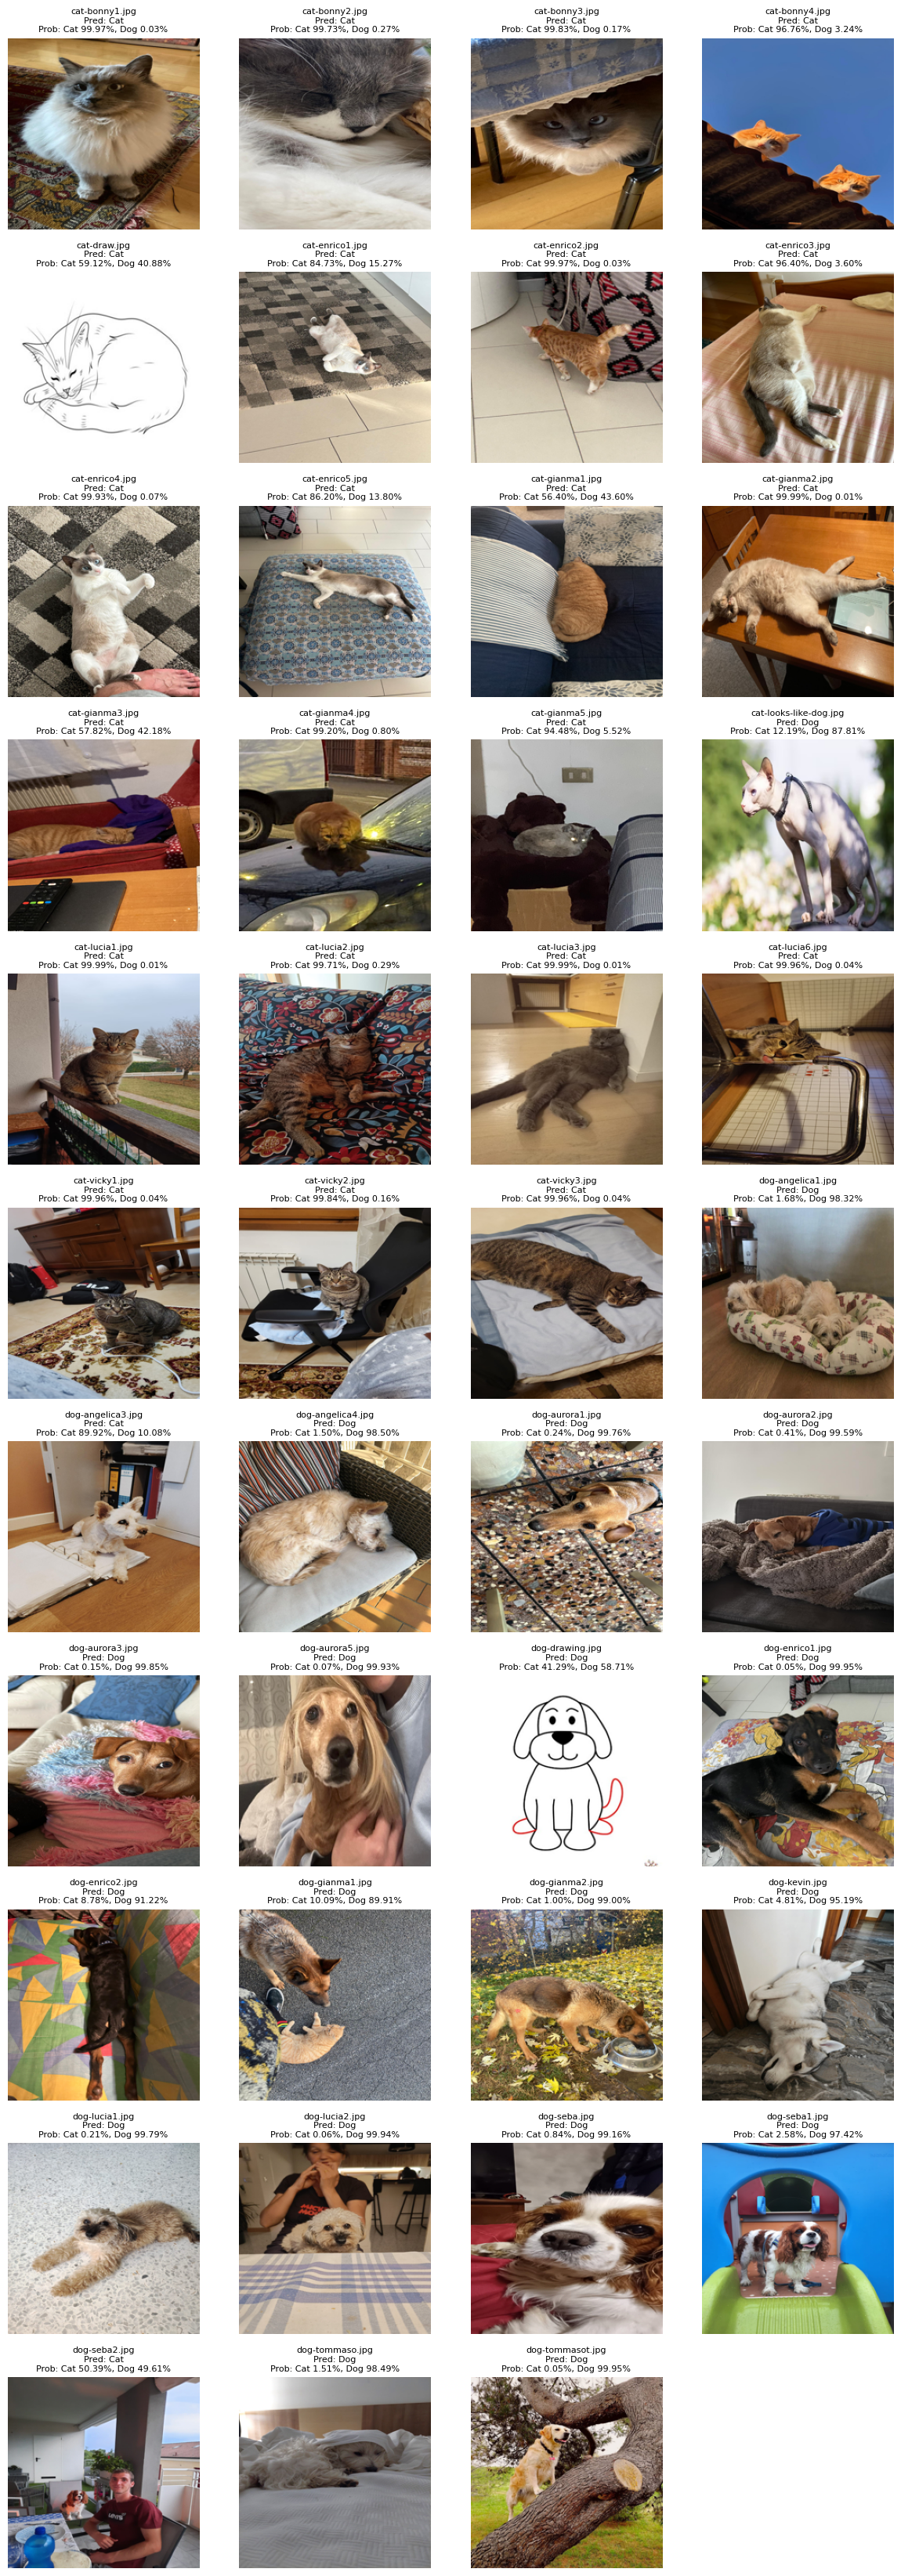

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = ResNetBinaryClassifier().to(device)
model.load_state_dict(torch.load('best_model.pth'))
# model.load_state_dict(torch.load('best_model_fine.pth'))

demo(model, 'data/demo', device)